# Disaggregation Data
This data was collected using Nikola's plug-level sensors (specifically sensor number 2).
- experiment 1: one device at a time
  + 3:30:14: sensor plugged into extension cord (no other devices)
  + 3:33:00: attach christmas lights to sensor directly
  + 3:35:08: unplug lights "a little late"
  + 3:36:00: attach iPhone 5S "partially charged"
  + 3:38:00: disconnect iPhone
  + 3:40:00: attach lamp (powered on)
  + 3:42:00: power off lamp
  + 3:44:00: power on lamp
  + 3:46:00: detach lamp from sensor
  + 3:48:03: attach microwave (off)
  + 3:50:01: power on microwave for two minutes
  + 3:52:01: power off microwave, leave attached
  + 3:54:01: END DATA COLLECTION
- experiment 2: power strip with various devices
  + 11:14:00: empty power strip plugged into sensor
  + 11:16:00: attach christmas lights to power strip
  + 11:18:00: attach iPhone 5S "zero battery life"
  + 11:20:00: detach christmas lights
  + 11:22:10: attach powered on lamp
  + 11:24:00: power off lamp
  + 11:26:00: attach christmas lights
  + 11:28:00: power on lamp
  + 11:30:00: disconnect iPhone "leave charger still attached"
  + 11:32:00: power off lamp
  + 11:34:00: unplug christmas lights
  + 11:36:00: disconnect lamp
  + 11:38:00: disconnect iPhone 5S charger
  + 11:40:00: END DATA COLLECTION
- experiment 3: moving a microwave to different outlets
  + 12:14:00: nothing attached
  + 12:16:00: plug microwave directly in
  + 12:18:00: plug microwave to adjacent outlet
  + 12:20:00: plug microwave to outlet on adjacent wall
  + 12:22:00: END DATA COLLECTION

In [1]:
# Imports
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.__version__

Populating the interactive namespace from numpy and matplotlib


'0.15.2'

In [2]:
# Read in data from csv file.
experiments = range(1,4)

dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

pieces = []
columns = ["time", "current (amps)", "power (watts)"]

for experiment in experiments:
    path = "15-01-25-experiment-{}/data.csv".format(experiment)
    frame = pd.read_csv(path, names=columns, parse_dates=[0], date_parser=dateparse)
    frame['experiment'] = experiment
    pieces.append(frame)

data = pd.concat(pieces, ignore_index=True)
data = data.set_index('time')

In [3]:
data.head()

,current (amps),power (watts),experiment
time,,,
2015-01-25 15:30:14,0.0076,3.2915,1
2015-01-25 15:30:14,0.0076,2.2881,1
2015-01-25 15:30:17,0.0114,2.8872,1
2015-01-25 15:30:19,0.0266,8.4914,1
2015-01-25 15:30:21,0.0152,3.8846,1


In [4]:
data.describe()

,current (amps),power (watts),experiment
count,1691.000000,1691.000000,1691.000000
mean,0.518766,157.837406,1.718510
std,1.761349,553.140064,0.685441
min,0.000000,0.000000,1.000000
25%,0.064500,17.681800,1.000000
50%,0.072100,22.114000,2.000000
75%,0.235300,66.597650,2.000000
max,10.759000,3704.792800,3.000000


In [5]:
grouped = data.groupby(data.experiment)

experiment
1             Axes(0.125,0.2;0.775x0.7)
2             Axes(0.125,0.2;0.775x0.7)
3             Axes(0.125,0.2;0.775x0.7)
dtype: object

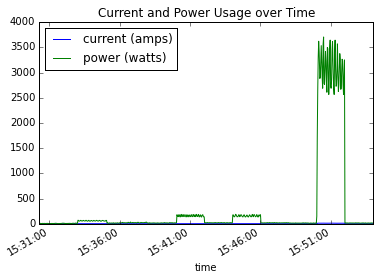

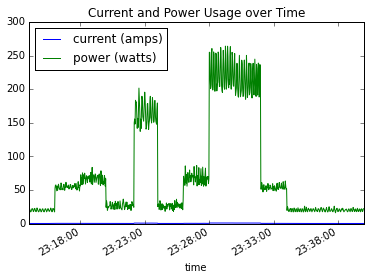

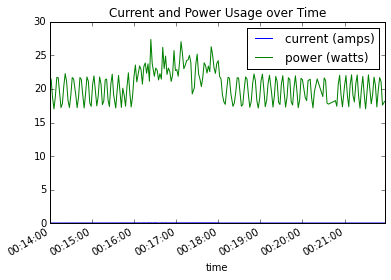

In [6]:
grouped.plot(title="Current and Power Usage over Time", secondary_y=['current'])

## Experiment 1: One Device at a Time
1. Determine average energy usage:
  - baseline: no devices connected
  - Christmas lights
  - iPhone charger
    + with iPhone
    + without iPhone
  - lamp
    + on
    + off
  - microwave
    + on
    + off

In [7]:
# Setup.
experiment1 = data[data.experiment == 1].drop('experiment', 1)
experiment1.head()

,current (amps),power (watts)
time,,
2015-01-25 15:30:14,0.0076,3.2915
2015-01-25 15:30:14,0.0076,2.2881
2015-01-25 15:30:17,0.0114,2.8872
2015-01-25 15:30:19,0.0266,8.4914
2015-01-25 15:30:21,0.0152,3.8846


,current (amps),power (watts)
count,83.000000,83.000000
mean,0.017947,5.321624
std,0.007653,2.487861
min,0.000000,0.000000
25%,0.011400,3.450300
50%,0.019000,4.820500
75%,0.022800,7.024000
max,0.034200,12.685100


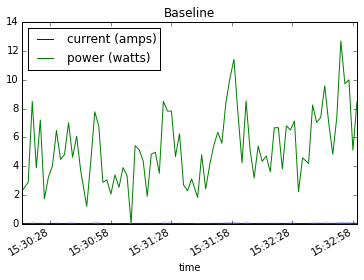

In [8]:
experiment1[:'2015-01-25 15:33:00'].plot(title="Baseline", secondary_y='current')
experiment1[:'2015-01-25 15:33:00'].describe()

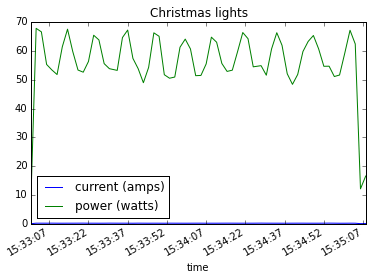

In [9]:
experiment1['2015-01-25 15:33:00':'2015-01-25 15:35:08'].plot(title="Christmas lights",
                                                             secondary_y='current')

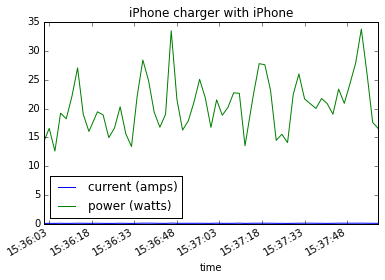

In [10]:
experiment1['2015-01-25 15:36:00':'2015-01-25 15:38:00'].plot(title="iPhone charger with iPhone",
                                                             secondary_y='current')

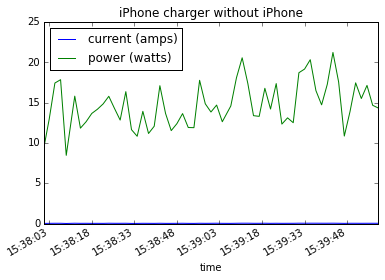

In [11]:
experiment1['2015-01-25 15:38:00':'2015-01-25 15:40:00'].plot(title="iPhone charger without iPhone",
                                                             secondary_y='current')

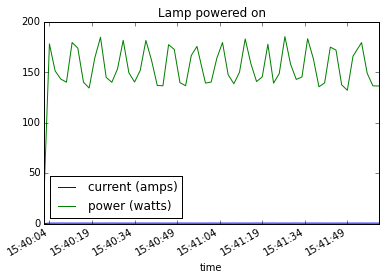

In [12]:
experiment1['2015-01-25 15:40:00':'2015-01-25 15:42:00'].plot(title="Lamp powered on",
                                                             secondary_y='current')

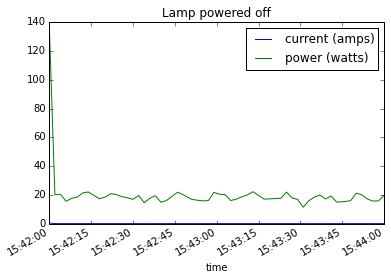

In [13]:
experiment1['2015-01-25 15:42:00':'2015-01-25 15:44:00'].plot(title="Lamp powered off",
                                                             secondary_y='current')

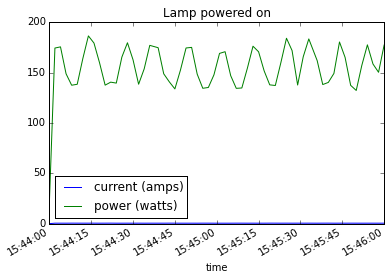

In [14]:
experiment1['2015-01-25 15:44:00':'2015-01-25 15:46:00'].plot(title="Lamp powered on",
                                                             secondary_y='current')

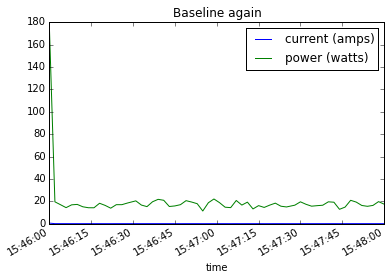

In [15]:
experiment1['2015-01-25 15:46:00':'2015-01-25 15:48:00'].plot(title="Baseline again",
                                                             secondary_y='current')

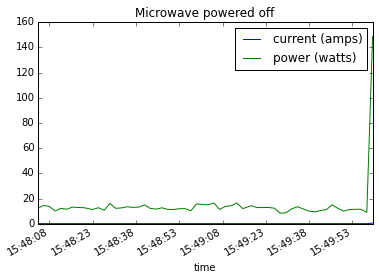

In [16]:
experiment1['2015-01-25 15:48:03':'2015-01-25 15:50:01'].plot(title="Microwave powered off",
                                                             secondary_y='current')

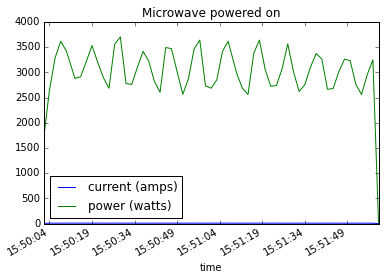

In [17]:
experiment1['2015-01-25 15:50:01':'2015-01-25 15:52:01'].plot(title="Microwave powered on",
                                                             secondary_y='current')

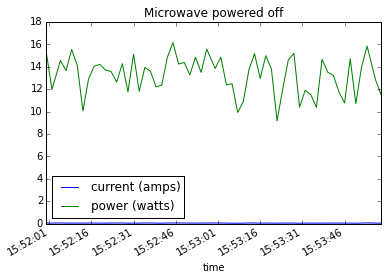

In [18]:
experiment1['2015-01-25 15:52:00':'2015-01-25 15:54:00'].plot(title="Microwave powered off",
                                                             secondary_y='current')

## Experiment 2

In [19]:
experiment2 = data[data.experiment == 2].drop('experiment', 1)
experiment2.head()

,current (amps),power (watts)
time,,
2015-01-25 23:14:00,0.0721,21.8677
2015-01-25 23:14:00,0.0721,22.6899
2015-01-25 23:14:04,0.0645,21.4599
2015-01-25 23:14:06,0.0645,19.1828
2015-01-25 23:14:08,0.0645,17.4284


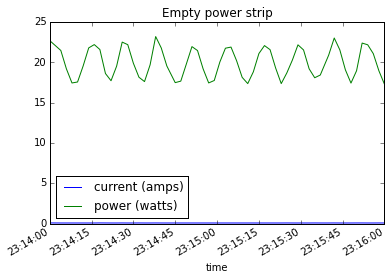

In [20]:
experiment2['2015-01-25 23:14:00':'2015-01-25 23:16:00'].plot(title="Empty power strip",
                                                             secondary_y='current')

,current (amps),power (watts)
count,60.000000,60.000000
mean,0.201888,53.870790
std,0.024440,5.800793
min,0.064500,17.274500
25%,0.189800,52.060575
50%,0.197300,54.115100
75%,0.213450,56.995525
max,0.242900,62.276400


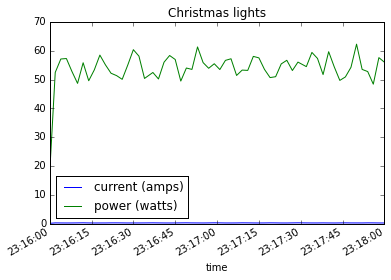

In [21]:
experiment2['2015-01-25 23:16:00':'2015-01-25 23:18:00'].plot(title="Christmas lights",
                                                             secondary_y='current')
experiment2['2015-01-25 23:16:00':'2015-01-25 23:18:00'].describe()

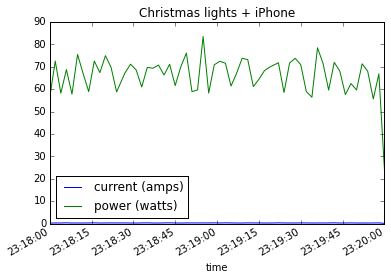

In [31]:
experiment2['2015-01-25 23:18:00':'2015-01-25 23:20:00'].plot(title="Christmas lights + iPhone",
                                                             secondary_y='current')

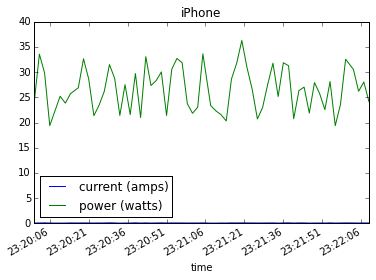

In [23]:
experiment2['2015-01-25 23:20:00':'2015-01-25 23:22:10'].plot(title="iPhone",
                                                             secondary_y='current')

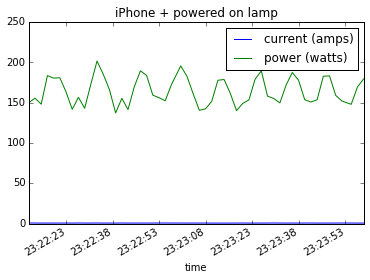

In [24]:
experiment2['2015-01-25 23:22:10':'2015-01-25 23:24:00'].plot(title="iPhone + powered on lamp",
                                                             secondary_y='current')

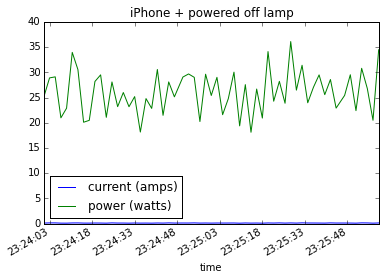

In [25]:
experiment2['2015-01-25 23:24:00':'2015-01-25 23:26:00'].plot(title="iPhone + powered off lamp",
                                                             secondary_y='current')

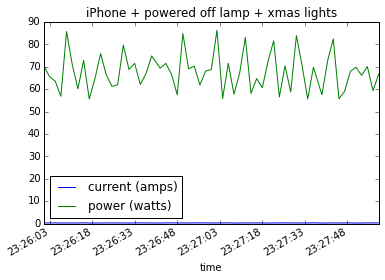

In [26]:
experiment2['2015-01-25 23:26:00':'2015-01-25 23:28:00'].plot(title="iPhone + powered off lamp + xmas lights",
                                                             secondary_y='current')

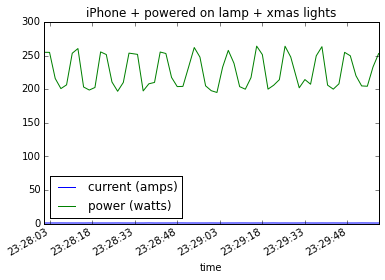

In [27]:
experiment2['2015-01-25 23:28:00':'2015-01-25 23:30:00'].plot(title="iPhone + powered on lamp + xmas lights",
                                                             secondary_y='current')

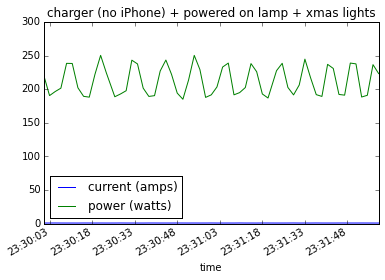

In [28]:
experiment2['2015-01-25 23:30:00':'2015-01-25 23:32:00'].plot(title="charger (no iPhone) + powered on lamp + xmas lights",
                                                             secondary_y='current')

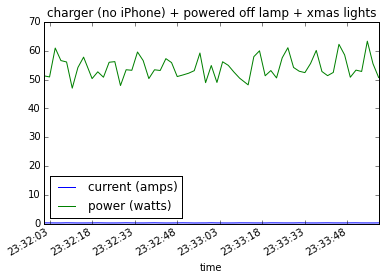

In [29]:
experiment2['2015-01-25 23:32:00':'2015-01-25 23:34:00'].plot(title="charger (no iPhone) + powered off lamp + xmas lights",
                                                             secondary_y='current')

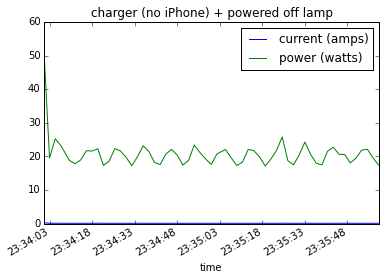

In [30]:
experiment2['2015-01-25 23:34:00':'2015-01-25 23:36:00'].plot(title="charger (no iPhone) + powered off lamp",
                                                             secondary_y='current')

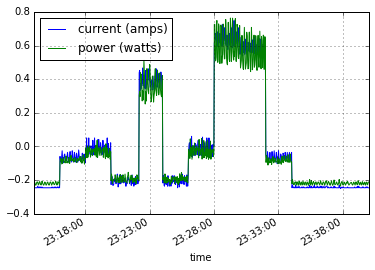

In [35]:
ex2 = experiment2
ex2_norm = (ex2 - ex2.mean()) / (ex2.max() - ex2.min())
ex2_norm.plot()